In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import matplotlib.dates as mdates

/tmp/ipykernel_1170960/3516563556.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


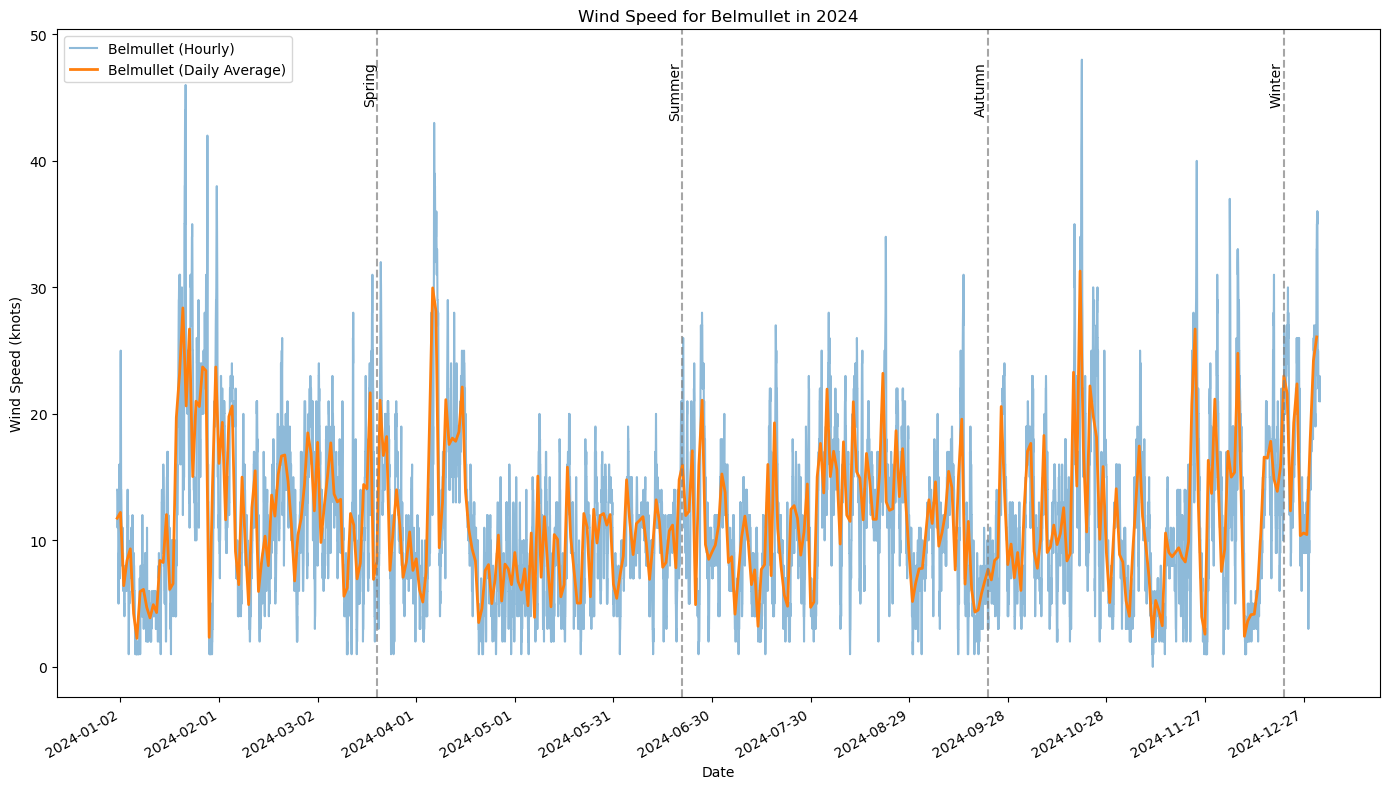

/tmp/ipykernel_1170960/3516563556.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


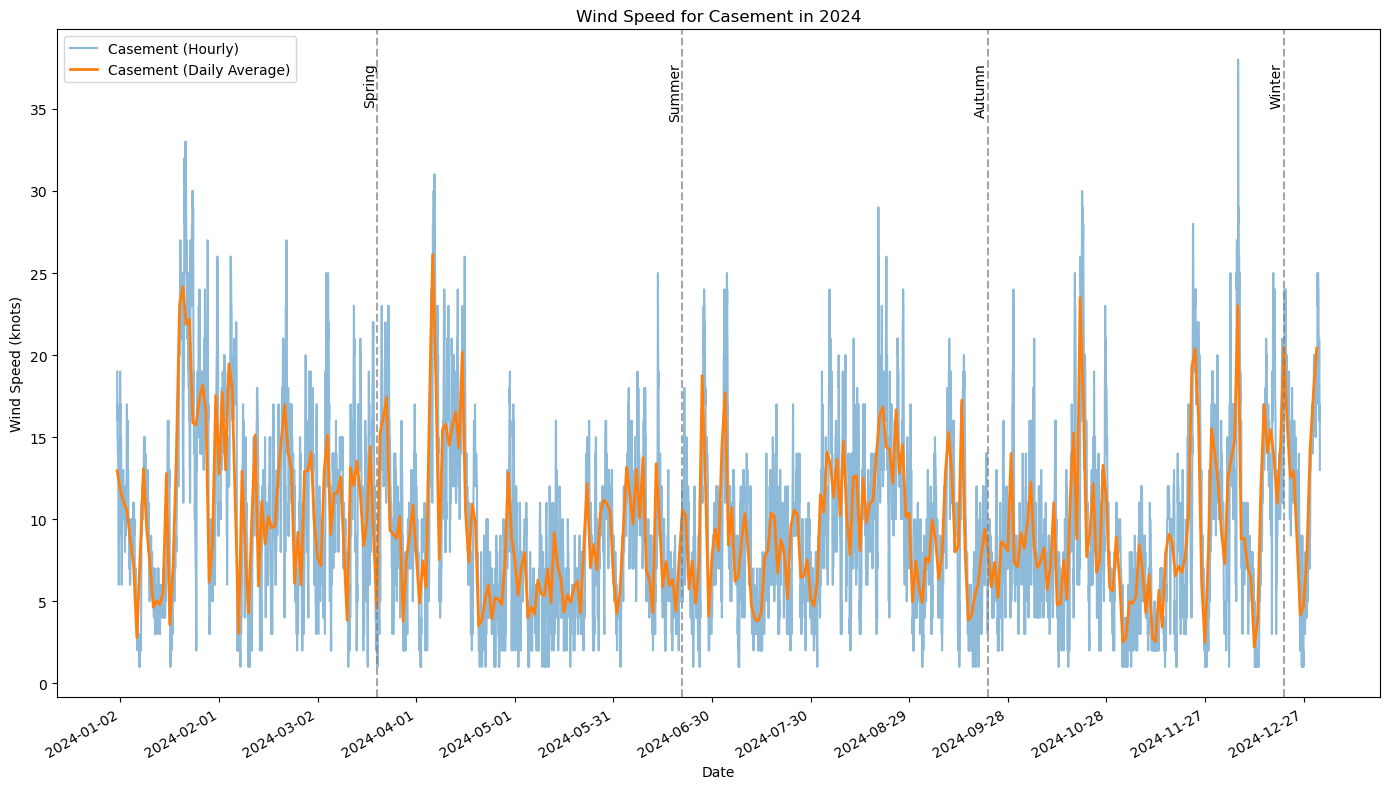

/tmp/ipykernel_1170960/3516563556.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


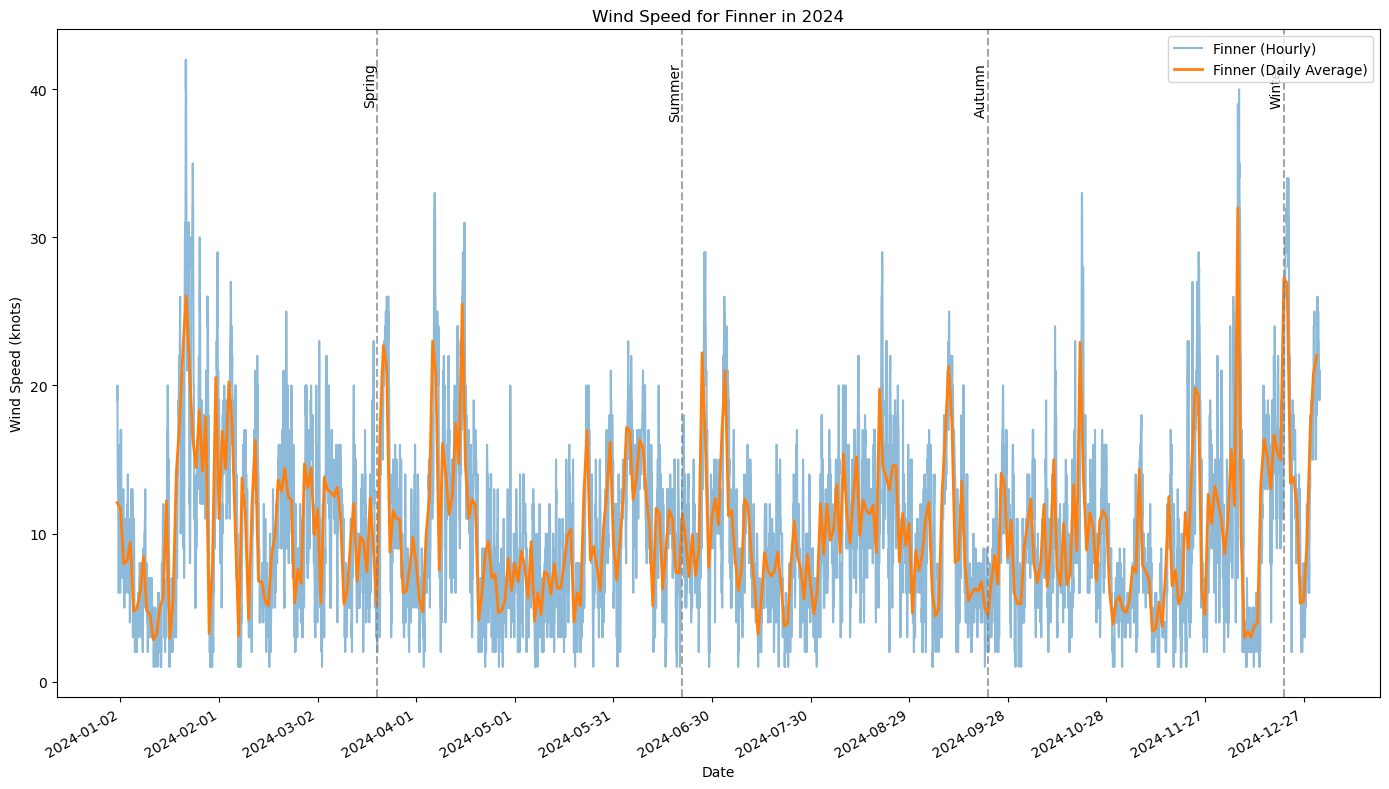

/tmp/ipykernel_1170960/3516563556.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


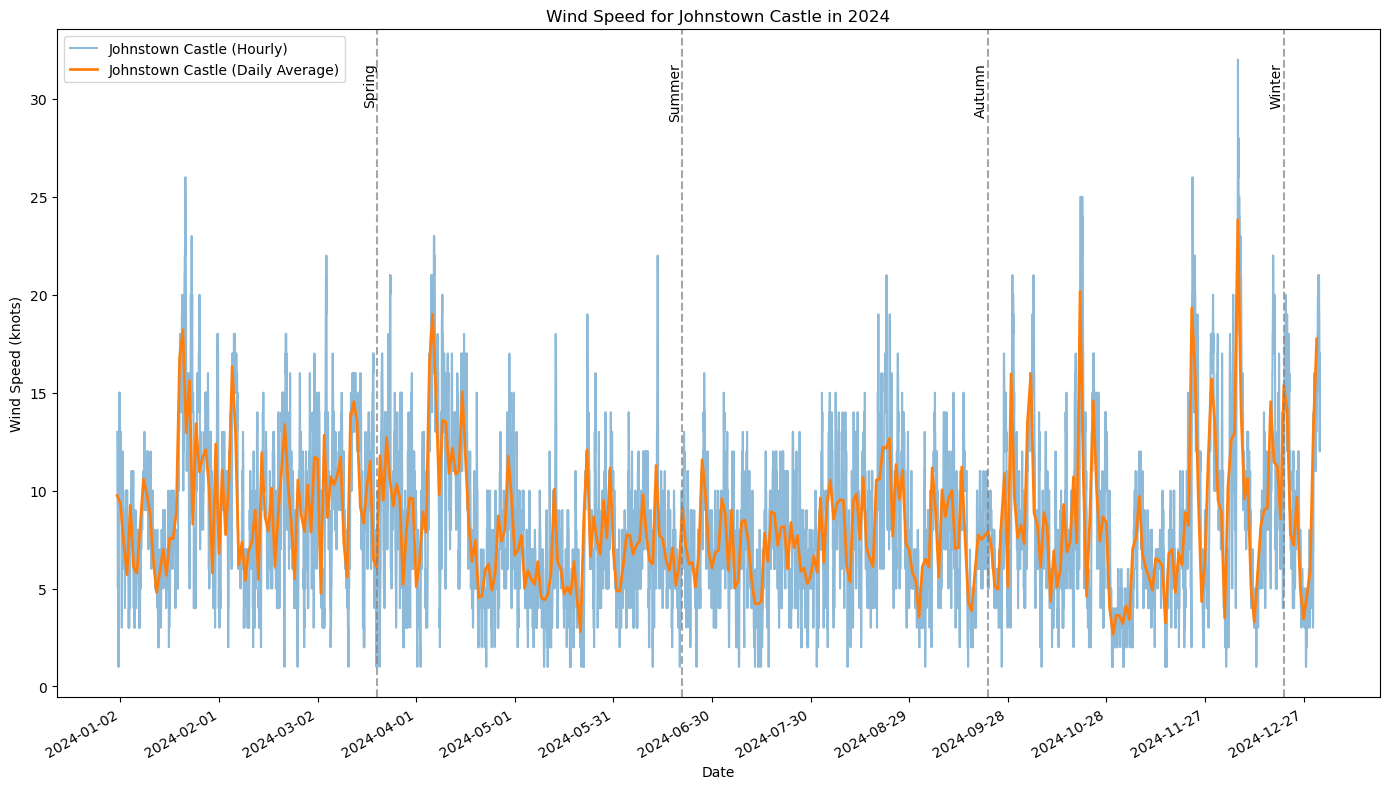

/tmp/ipykernel_1170960/3516563556.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


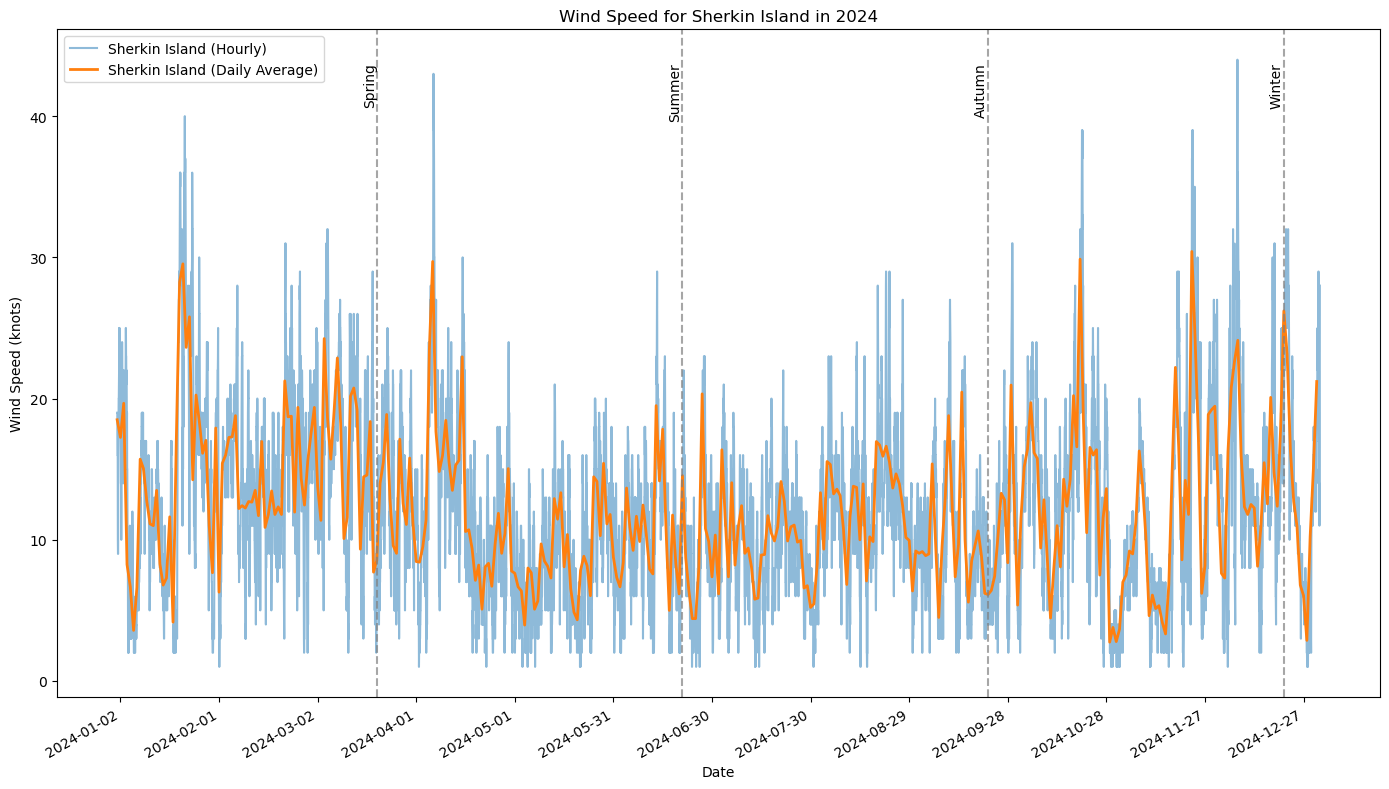

In [13]:
# Define the data directory and station files
data_dir = './data'
station_files = {
    'Belmullet': 'belmullet_hourly.csv',
    'Casement': 'casement_hourly.csv',
    'Finner': 'finner_hourly.csv',
    'Johnstown Castle': 'johnstown_castle_2_hourly.csv',
    'Sherkin Island': 'sherkinisland_hourly.csv'
}

# Define seasons with their start dates for 2024
seasons = {
    'Winter': '2024-01-01',
    'Spring': '2024-03-20',
    'Summer': '2024-06-21',
    'Autumn': '2024-09-22',
    'Winter': '2024-12-21'
}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a separate figure for each station
for station_name, file_name in station_files.items():
    plt.figure(figsize=(14, 8))

    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path, low_memory=False)
    df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
    df_2024 = df[df['date'].dt.year == 2024]

    # Convert wdsp to numeric if it's not already
    df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')

    # Plot hourly data
    plt.plot(df_2024['date'], df_2024['wdsp'], label=f'{station_name} (Hourly)',
             color=colors[0], alpha=0.5)

    # Calculate and plot daily average
    daily_avg = df_2024.groupby(df_2024['date'].dt.date)['wdsp'].mean().reset_index()
    daily_avg['date'] = pd.to_datetime(daily_avg['date'])
    plt.plot(daily_avg['date'], daily_avg['wdsp'],
             label=f'{station_name} (Daily Average)',
             color=colors[1], linewidth=2)

    # Add season markers
    for season, start_date in seasons.items():
        start = pd.to_datetime(start_date)
        if start in df_2024['date'].values or (start >= df_2024['date'].min() and start <= df_2024['date'].max()):
            plt.axvline(x=start, color='gray', linestyle='--', alpha=0.7)
            plt.text(start, plt.ylim()[1]*0.95, f"{season}",
                        rotation=90, verticalalignment='top', horizontalalignment='right')

    # Configure the plot
    plt.title(f'Wind Speed for {station_name} in 2024')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (knots)')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    # plt.savefig(f'wind_speed_{station_name.replace(" ", "_")}_2024.pdf', format='pdf')
    plt.show()

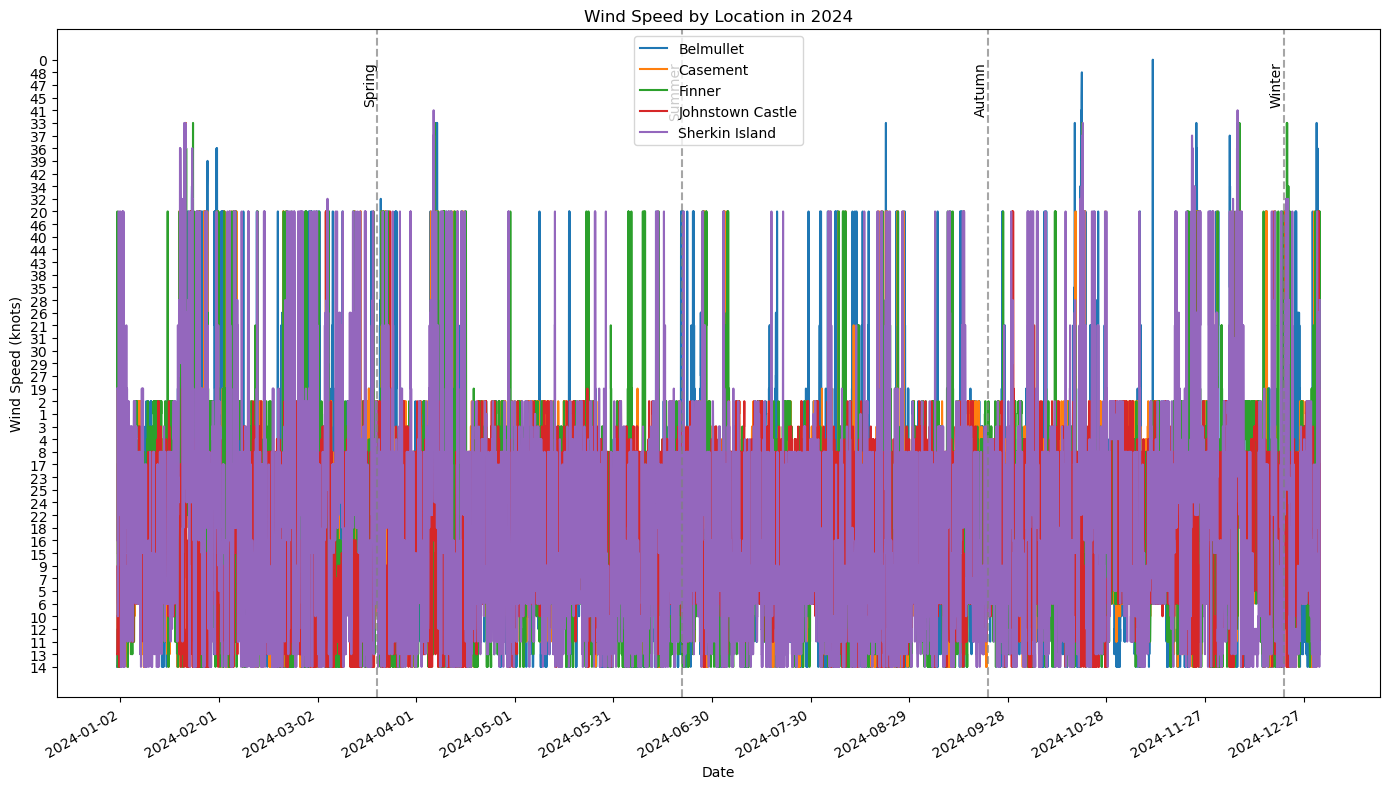

In [12]:
plt.figure(figsize=(14, 8))
for i, (station_name, file_name) in enumerate(station_files.items()):
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path, low_memory=False)
    df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
    df_2024 = df[df['date'].dt.year == 2024]
    if len(df_2024) > 0:
        plt.plot(df_2024['date'], df_2024['wdsp'], label=station_name, color=colors[i % len(colors)])

for season, start_date in seasons.items():
    start = pd.to_datetime(start_date)
    plt.axvline(x=start, color='gray', linestyle='--', alpha=0.7)
    plt.text(start, plt.ylim()[1]*0.95, f"{season}",
             rotation=90, verticalalignment='top', horizontalalignment='right')

plt.title('Wind Speed by Location in 2024')
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
# plt.savefig('wind_speed_all_stations_2024.pdf', format='pdf')
plt.tight_layout()
plt.show()